# Open signals

In [11]:
import numpy as np
from scipy.io import loadmat 
import mne, glob 
import matplotlib.pyplot as plt
import neurokit2 as nk
import pandas as pd
import os
# import skfda
import scipy

In [2]:
import neurokit2 as nk

In [5]:
directory = os.getcwd()

path_adhd = "\ADHD"
matfiles_adhd = glob.glob(directory + path_adhd + '/*.mat')

path_control = "\Control"
matfiles_control = glob.glob(directory + path_control + '/*.mat')

In [80]:
data_adhd = loadmat(matfiles_adhd[3])
data_control = loadmat(matfiles_control[1])

data_adhd

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:35 2020',
 '__version__': '1.0',
 '__globals__': [],
 'v15p': array([[1317,  719, 1340, ..., 1282,  332,  825],
        [1317,  825, 1377, ..., 1493,  613, 1106],
        [1458,  930, 1561, ..., 1458,  332,  930],
        ...,
        [ 226,  191,   89, ...,   85,  121,  156],
        [ 121,  261,   89, ...,  297,  367,  402],
        [ 226,  261,  236, ...,  226,   50,   50]], dtype=int16)}

In [82]:
name = 'v15p'

channel_names = ["Fp1", "Fp2","F3","F4","C3","C4","P3","P4","O1","O2","F7","F8","T7", 
              "T8", "P7","P8","Fz","Cz","Pz"] 
sfreq=128

n_channels = len(data_adhd[name][1,:])

In [83]:
info = mne.create_info(
        ch_names = channel_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq 
        )   

info.set_montage('standard_1020')

simulated_raw = mne.io.RawArray(data_adhd[name].T, info)
fp1_preica=simulated_raw._data[0]
t_preica=simulated_raw.times

fs=128
f_preica, Pxx_den_preica = scipy.signal.welch(fp1_preica, fs)
P_log_preica=np.log(Pxx_den_preica)


Creating RawArray with float64 data, n_channels=19, n_times=43252
    Range : 0 ... 43251 =      0.000 ...   337.898 secs
Ready.


## Filtraggio

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


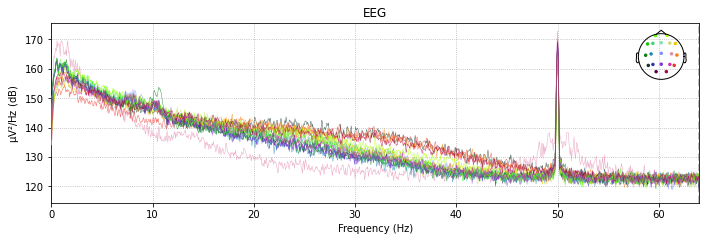

Effective window size : 16.000 (s)


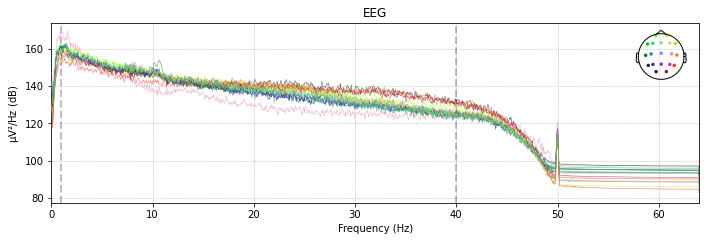

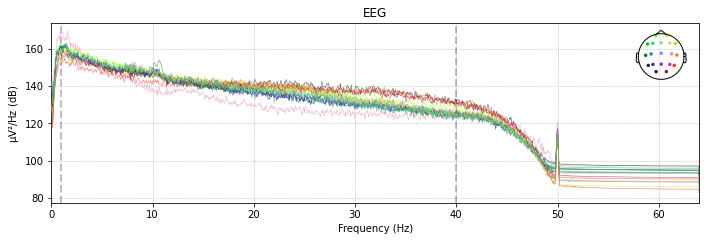

In [84]:
#FILTRI
filt_raw = simulated_raw.copy().filter(l_freq=1., h_freq=40.)

simulated_raw.plot_psd()
filt_raw.plot_psd()


### ICA

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by explained variance: 8 components
Fitting ICA took 0.2s.


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\c

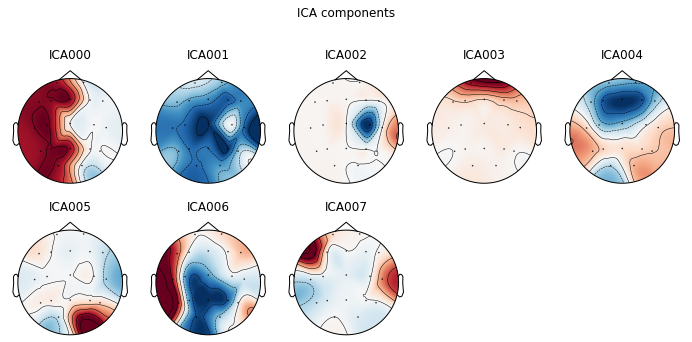

[<MNEFigure size 702x357.12 with 8 Axes>]

In [85]:
# ICA
ica = mne.preprocessing.ICA(n_components=0.9, random_state=97, max_iter=800)
ica.fit(filt_raw)
ica.plot_components()
#ica.exclude = [1, 2]


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Not setting metadata
Not setting metadata
168 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Users\erica\miniconda3\envs\NL2\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


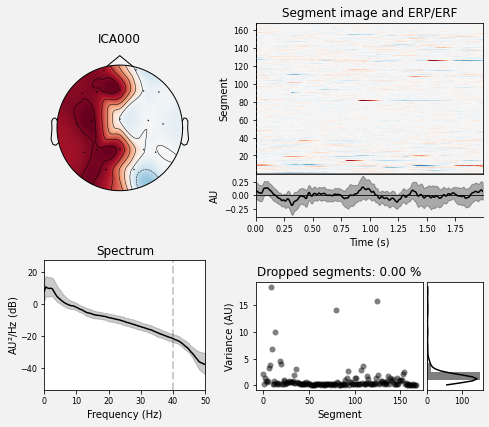

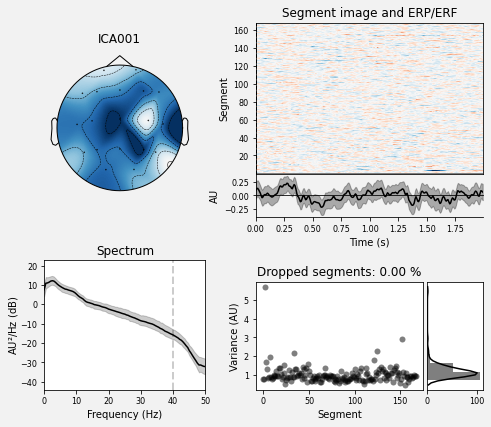

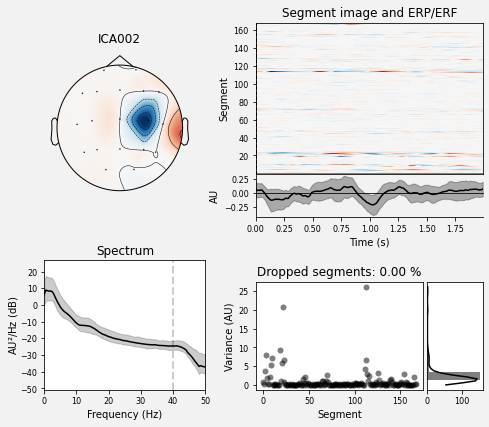

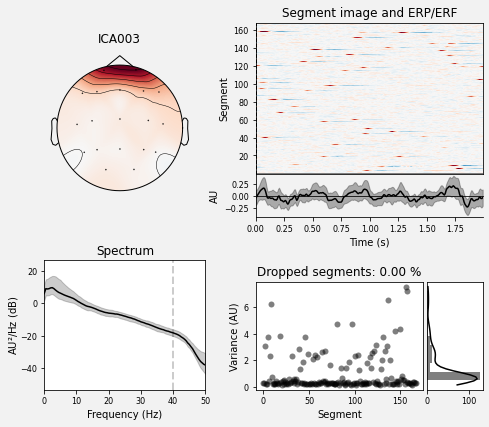

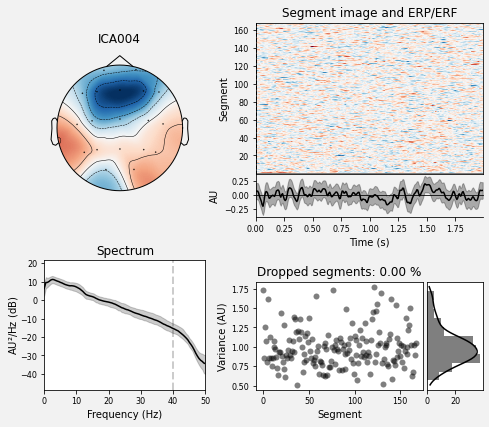

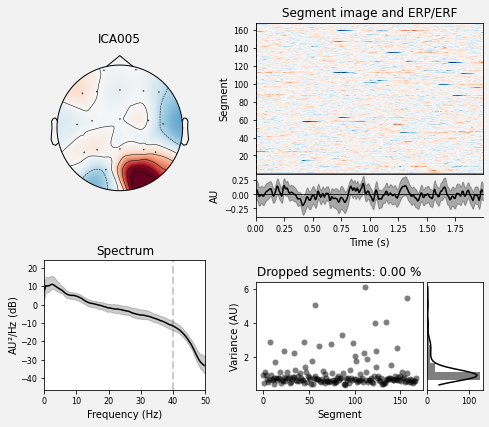

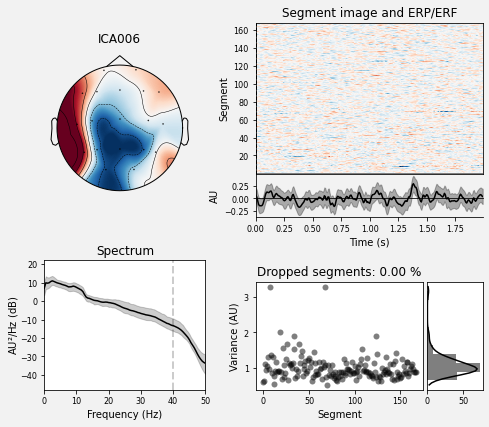

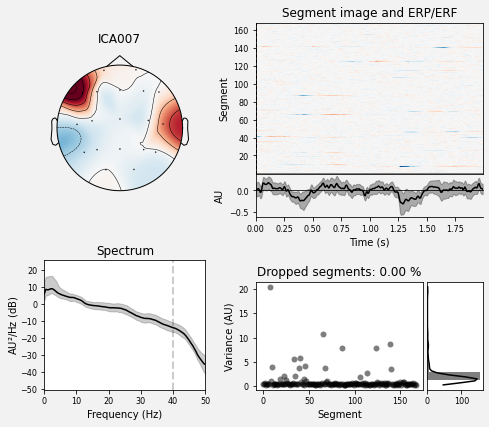

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [86]:
n_comp = 8
ica.plot_properties(filt_raw, picks=np.arange(n_comp))

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


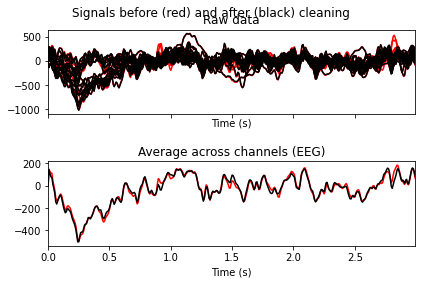

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components


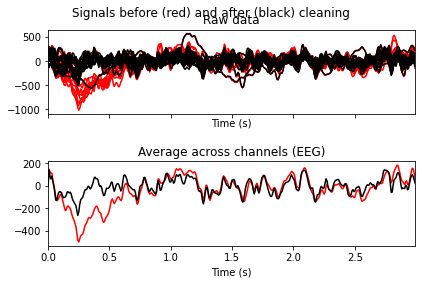

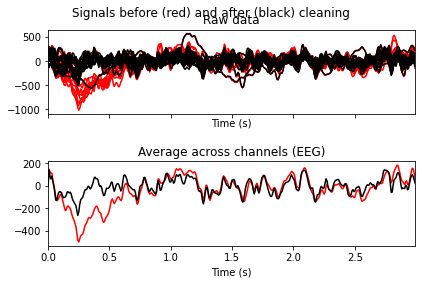

In [87]:
ica.plot_overlay(filt_raw, exclude=[3], picks='eeg')
ica.plot_overlay(filt_raw, exclude=[0,3], picks='eeg')

Componenti da rimuovere ICA
* 0: 0,
* 1: 0, 6,
* 2: 0,
* 3: 0, 